In [12]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
const.BEHAVE_DIR

PosixPath('/Users/shannonlee/Documents/action_prediction/data/behavior')

In [14]:
# initialize dataset
data = DataSet(task='social_prediction')

# load behavior
df_behav = data.load_behav()

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)


In [15]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column
#look into label and condition, initiator + label, etc


In [16]:
df_merged.initiator_condition_name
df_behav.initiator_condition_name

43176      male_hard
43177    female_hard
43178    female_easy
43179    female_easy
43180    female_easy
            ...     
53719    female_easy
53720      male_easy
53721      male_easy
53722    female_easy
53723    female_easy
Name: initiator_condition_name, Length: 7524, dtype: object

##### Questions/relationships to explore

##### General notes
amplitude- size of saccade
dispersion- how large are fixations? if small, subj. fixating in on smaller sphere/ coordinate range around x,y coords
if trend towards fixations getting smaller, could suggest that subj honing in on specific coords more regularly
fixation based on how long subj focusing on specific coord; able to get radius around specific coords
duration- specific to how long fixations last- what might the relationship be between duration of fixation and disperson of fixation? If fixating longer, could mean smaller dispersion (dependent on degree of fixation)
longer duration could correspond with increases in accuracy or decreases in rxn time
block_iter- 1, 2, 3 (for each task type)

How to measure degree of fixations? Large vs. small (dispersion measures the size of the fixations based on coordinates) 
Decreased dispersion = smaller fixation size --> could indicate longer focus on a specific coordinate and increased accuracy in trials

Dispersion based relationships: accuracy higher on easier trials, smaller fixation size --> higher accuracy --> lower dispersion on easy trials, longer duration
With difficult trials, might be more difficult to pinpoint where to focus attention/ gaze?

Specific variables to investigate: label, condition_name, actors
label vs accuracy
label vs. durations
label vs. dispersion- dont particularly intend to see major dispersion differences in label vs. dispersion


Based on the relationship between condition_name (hard vs. easy) and accuracy and the hypothesized relationship between longer durations and smaller dispersion (and potential assoction with increase accuracy, would expect different dispersion levels between hard vs. easy conditions. 

event type- instructions, task, etc
revisit initial thesis questions about learning over time... does your analysis give you enough info to answer the questions? 
How can I go back to the literature and make sense of the results? What was exploratory vs. hypothesis driven? Note that this experiment is generally more exploratory in nature


Relationships between condition_name and 
Two possible hypotheses:
Trends towards longer fixations could suggest that 

### Next steps
Formalize results a bit more from graphs, what do we know about learning? *maybe only learning easy videos, no obvious patterns of learning for difficult videos over time, at least based on learning? 
Are these results real? Looking for trends for individuals as well rather than just group data

Break down results and test out as many variables/ combinations as possible
Clean up starting results

#Summary sentences for each of the visualizations 

Look for supporting literature on gender bias with social prediction as well

Duration of fixations over time and accuracy, label 

#what are some interesting relationships/ hypotheses that I might be interested in? What would you expect BEFORE you try out a bunch of different things

Assess: can we infer something about learning from the eyetracking data? Looking at simple linear models to see if the combination of different eyetracking metrics tell us anything about the variance of accuracy and reaction time? 

1st result to show: general accuracy trend- increase over time based on the runs- show breakdown by participants and plots

Based on what we know about eyemovements, is this informative about how participants are learning? 

Additional literature background on- what do people find with learning and eye movements? Validation that what we are finding is related to previous work? How do people learn? how is this related to the eye tracking metrics we are 

Can shape narrative based on most convincing results- specific variables and relationships that have been noticed- gender-bias and how that affects learning

initiator preferenced based on learning 

This seems interesting- but can we delve into WHYpeople are learning? 
Changes in patterns of eyemovemetns that are correlated between changes in behavior
Modeling of variance that is changed with different metrics

Dont overfit with the model- cross validate the models and ridge regression

Additional future steps:

How are they learning- what attentional mechanisms are being used/developed, more attuned to certain aspects of social interactions- tracking of different parts of the bodies and moving through space and time

Focus lit review on different eyetracking metrics- what would be expected of fixations, amplitudes, etc when it comes to learning? fewer saccades and smaller amplitudes with learning? 



In [17]:
df_merged.columns

Index(['peak_velocity', 'amplitude', 'dispersion', 'start_gx', 'start_gy',
       'end_gx', 'end_gy', 'surface', 'end_time', 'type', 'duration',
       'mean_gx', 'mean_gy', 'block_iter', 'exp_event', 'task', 'event_type',
       'run_num', 'subtract', 'onset_sec', 'subj', 'sess', 'start_time',
       'actors', 'agents', 'angle', 'balance_exp', 'condition_name', 'context',
       'corr_key', 'corr_resp', 'dataset', 'display_trial_feedback',
       'extracted', 'feedback_type', 'hand', 'initiator',
       'initiator_start_frames', 'initiator_start_frames_corr',
       'initiator_start_frames_sec', 'interact_start_frames',
       'interact_start_frames_corr', 'interact_start_frames_sec', 'iti_dur',
       'label', 'media', 'real_start_time', 'replace_stimuli', 'resp_made',
       'rt', 'run_iter', 'session_type', 'stim', 'timestamp_sec', 'trial_dur',
       'trial_type', 'video_end', 'video_name', 'video_name_corrected',
       'video_start', 'block_iter_corr', 'initiator_condition_name'

In [18]:
df_merged.label.unique()

array(['handShake', 'hug'], dtype=object)

In [19]:
df_merged.columns
df_merged.block_iter_corr.unique()


array(['run01_block1', 'run01_block2', 'run01_block3', 'run02_block1',
       'run02_block2', 'run02_block3', 'run03_block1', 'run03_block2',
       'run03_block3', 'run04_block1', 'run04_block2', 'run04_block3',
       'run05_block1', 'run05_block2', 'run05_block3', 'run06_block1',
       'run06_block2', 'run06_block3', 'run07_block1', 'run07_block2',
       'run07_block3', 'run08_block1', 'run08_block2', 'run08_block3',
       'run09_block1', 'run09_block2', 'run09_block3', 'run10_block1',
       'run10_block2', 'run10_block3', 'run11_block1', 'run11_block2',
       'run11_block3', 'run12_block1', 'run12_block2', 'run12_block3',
       'run13_block1', 'run13_block2', 'run13_block3', 'run14_block1',
       'run14_block2', 'run14_block3'], dtype=object)

In [20]:

# initialize plotting style
vis.plotting_style()

#### Next steps
Statistical test to show whether there is a statistically significant difference between condition_names

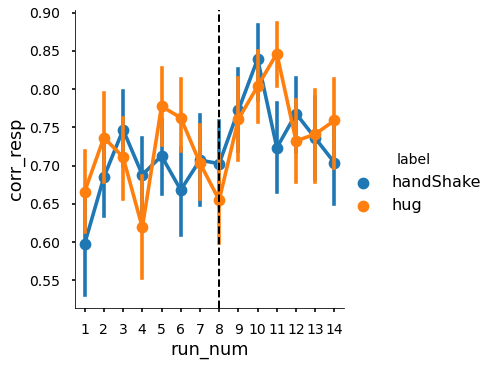

In [21]:
# visualize accuracy across runs
vis.plot_acc(dataframe=df_behav, x='run_num', hue= 'label')
#based on accuracy and condition relationship, may expect to see differences in duration 
#longer duration for easy condition based on accuracy?
#smaller dispersion for easy condition
#lower rt for easy
# more fixations for hard condition


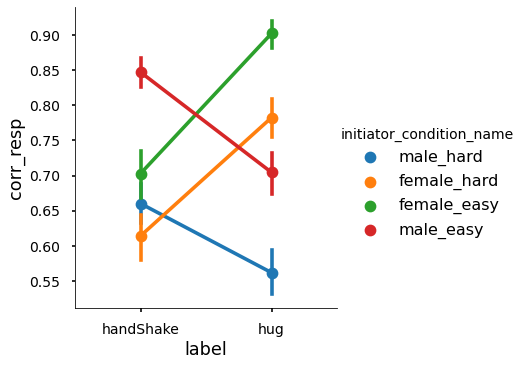

In [22]:
vis.plot_acc(dataframe=df_behav, x='label', hue= 'initiator_condition_name')
#initiator and gender bias for prediction accuracy
#initiator and fixation- do participates fixate more/ less depending on the initiator in the video 
#can also just plot without x= run_num, then statistical tests for sig. diff between condition and label 

When comparing accuracy and label broken down by initiator and condition name, participants were least accurate in making predictions for the hug label when males initiated in the hard condition, and most accurate when making predictions for the hug label when females initiated in the easy condition.

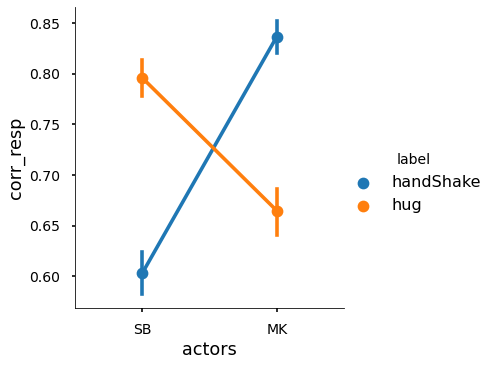

In [23]:
vis.plot_acc(dataframe=df_behav, x='actors', hue= "label")
#would be helpful to note this sort of relationship

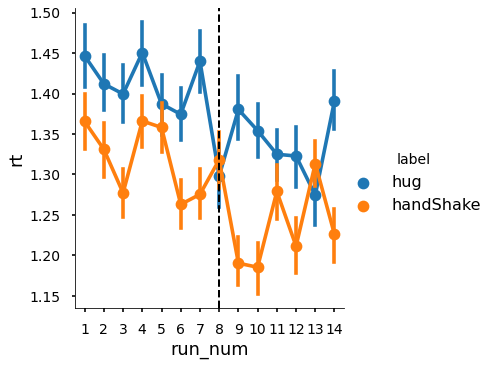

In [24]:
# visualize rt across runs by label
vis.plot_rt(dataframe=df_behav, x='run_num', hue='label')

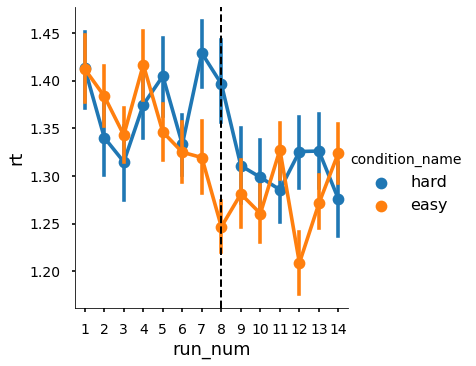

In [25]:
# visualize rt across runs by condition_name
vis.plot_rt(dataframe=df_behav, x='run_num', hue='condition_name')

In [26]:
#plot diameter
# vis.plot_diameter(dataframe=df_merged)

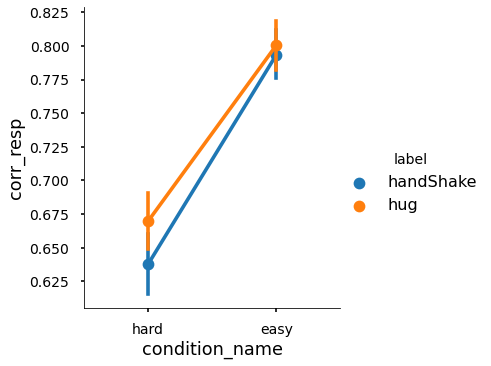

In [27]:
vis.plot_acc(dataframe=df_behav, x='condition_name', hue= "label")

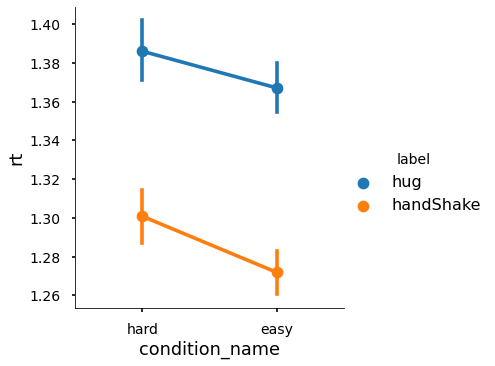

In [28]:
vis.plot_rt(dataframe=df_behav, x='condition_name', hue= "label")

In [29]:
# plot fixation count vs. condition name, separated by label
#not able to add "hue" criteria for these visuals
vis.plot_fixation_count(dataframe=df_merged, x='condition_name', hue= "label")

UnboundLocalError: local variable 'df' referenced before assignment

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x='condition_name', hue= "label")

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator_condition_name")
#more fixations and saccades for male initiators for this specific video type
#what does this say about prediction accuracy?
#is there a gendered effect in terms of eye-movements, accuracy,etc? 
#breakdown of individual participant results- are there fixation patterns that differ within individuals (male vs. female participants? how does this breakdown in terms of the initiator )

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator")


In [ ]:
vis.plot_rt(dataframe=df_behav, x='label', hue= 'initiator')


In [ ]:
vis.plot_saccade_count(dataframe=df_merged, x='label', hue= 'initiator')

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x= 'label', hue = 'initiator')


In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label')

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='run_num')
#think about confounds as well- 500 ms fixation cross before video onset

In [ ]:
# plot saccade count
vis.plot_saccade_count(dataframe=df_merged, x='label', hue= 'initiator')

In [ ]:
# plot fixation duration
vis.plot_fixation_duration(dataframe=df_merged, x='run_num')

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x= 'label', hue = 'initiator')
#interesting, check on duration timescale and significance

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='run_num')

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator")


In [ ]:
#plot duration vs. duration by label
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "label")

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "condition_name")

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x='run_num', hue = "actors")

In [ ]:
# plot amplitude
vis.plot_amplitude(dataframe=df_merged, x='run_num', hue= 'condition_name')

In [ ]:
# plot dispersion
#dispersion vs. actors
vis.plot_dispersion(dataframe=df_merged, x='label', hue= 'initiator')

In [11]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator")


UnboundLocalError: local variable 'df' referenced before assignment

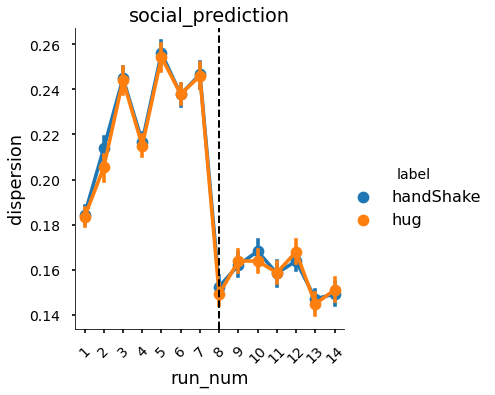

In [98]:
#plot dispersion
#dispersion vs. label
vis.plot_dispersion(dataframe=df_merged, x='run_num', hue = 'label')

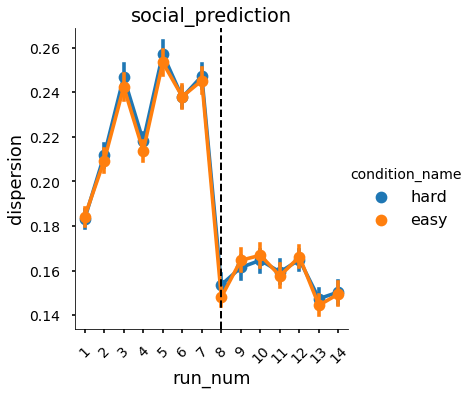

In [95]:
# plot dispersion
#dispersion vs. condition_name
vis.plot_dispersion(dataframe=df_merged, x='run_num', hue = 'condition_name')


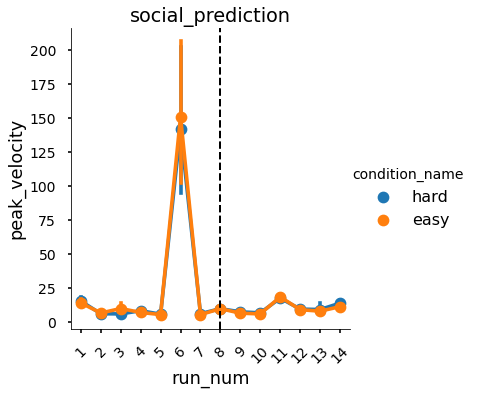

In [100]:
# plot peak velocity
#usual findings based on condition_name
vis.plot_peak_velocity(dataframe=df_merged, x='run_num', hue= 'condition_name')

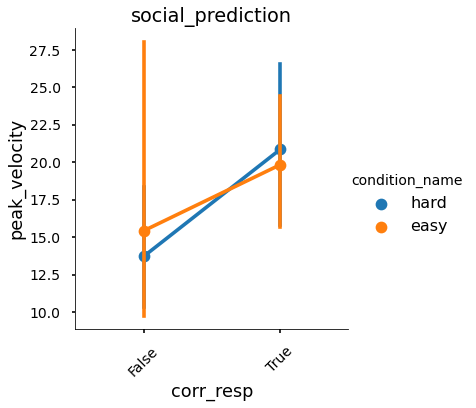

In [103]:
#Relationship between peak_velocity, condition_name, and accuracy

vis.plot_peak_velocity(dataframe=df_merged, x= 'corr_resp', hue= 'condition_name')

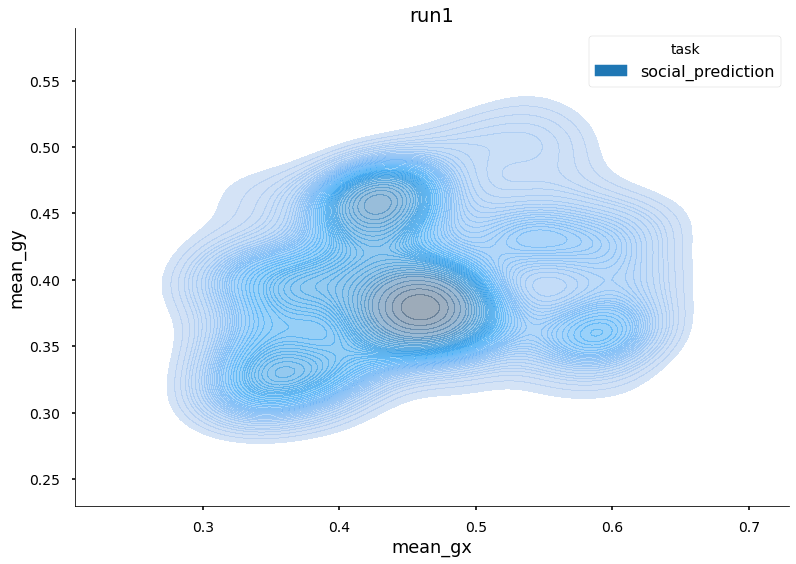

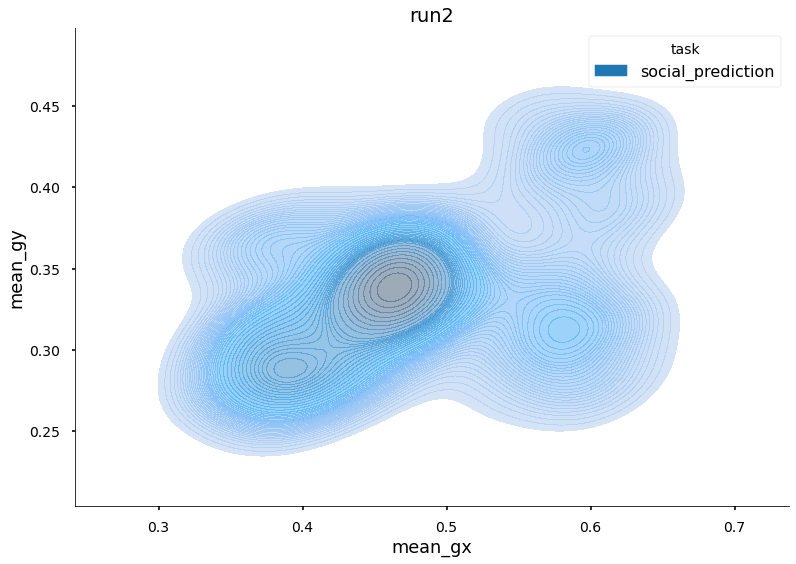

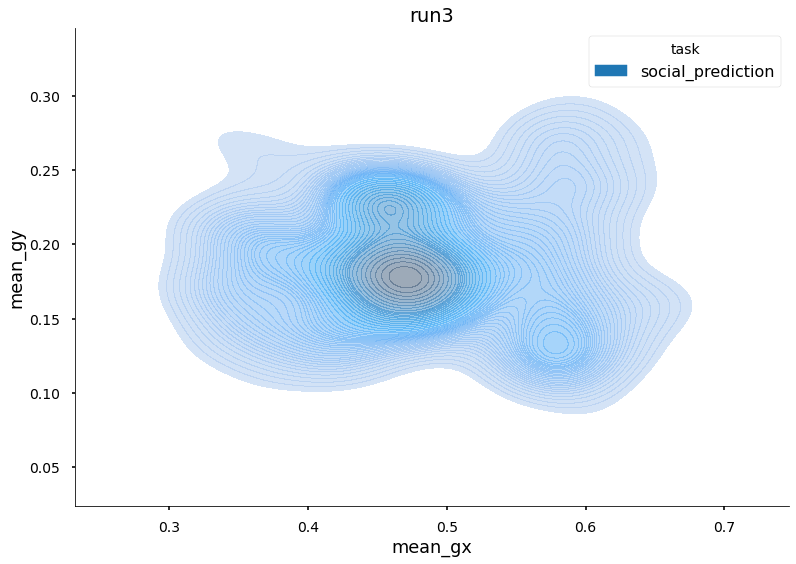

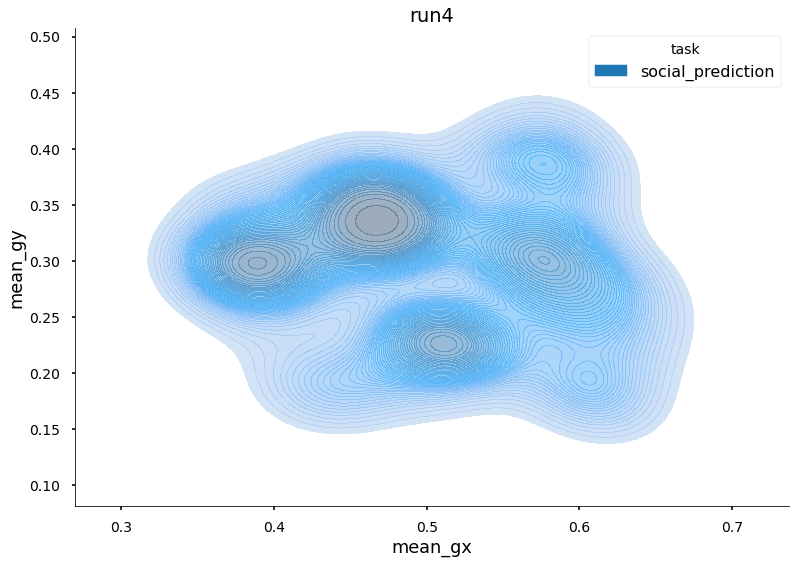

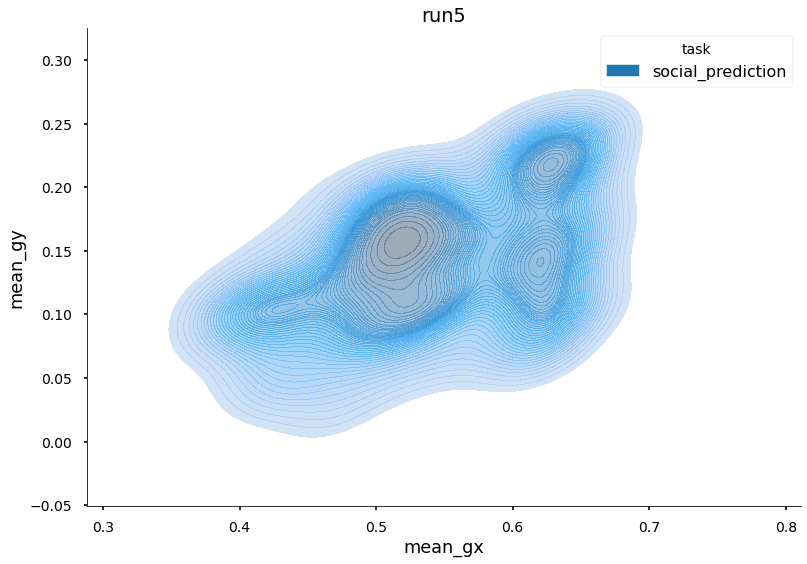

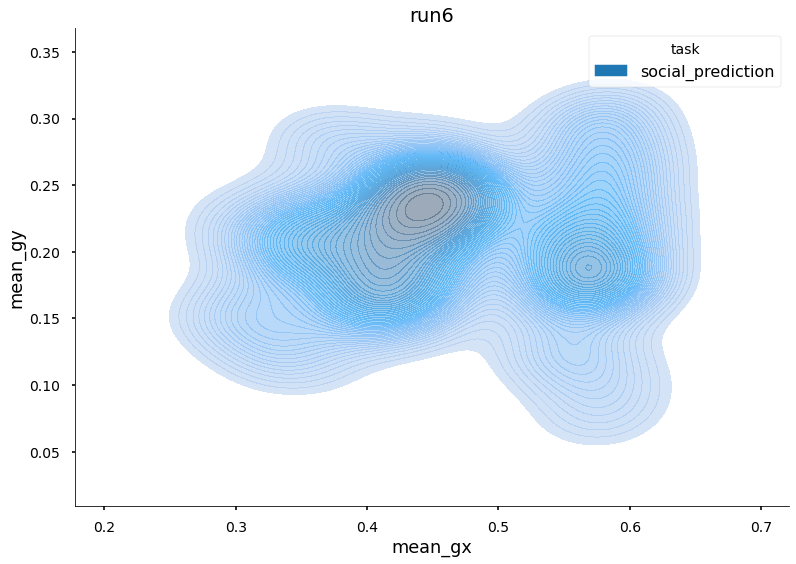

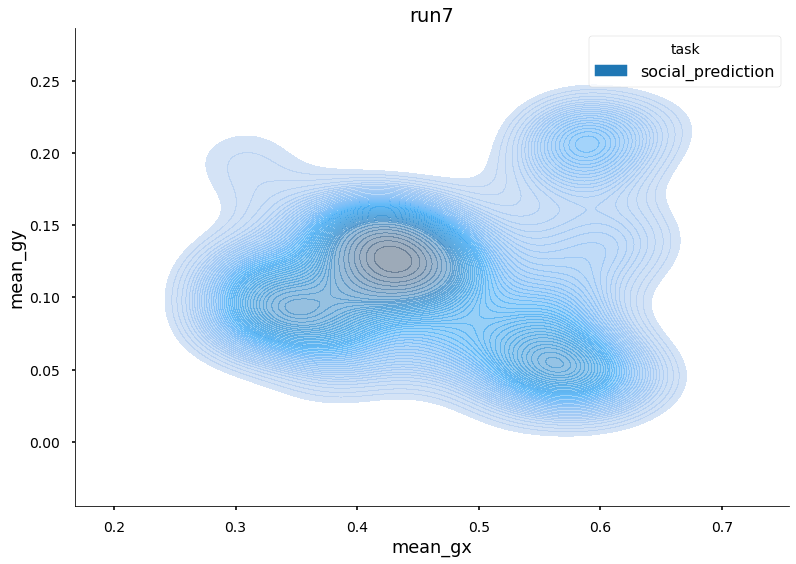

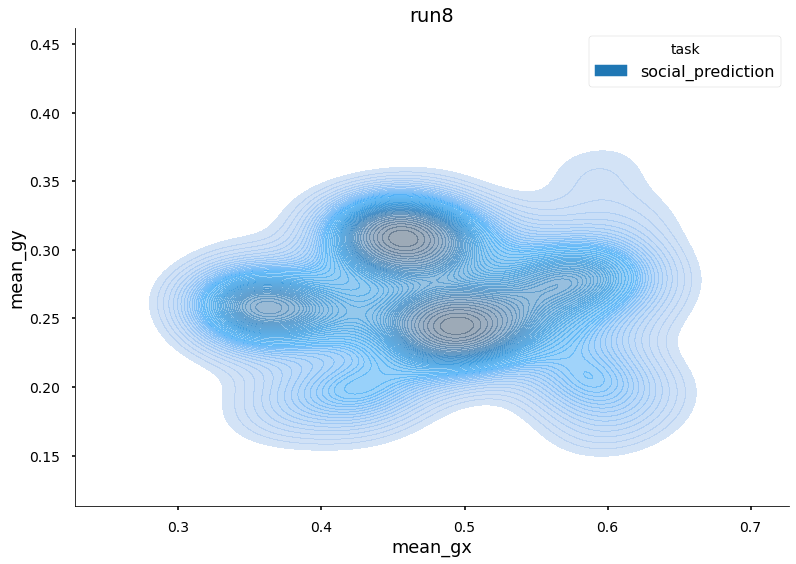

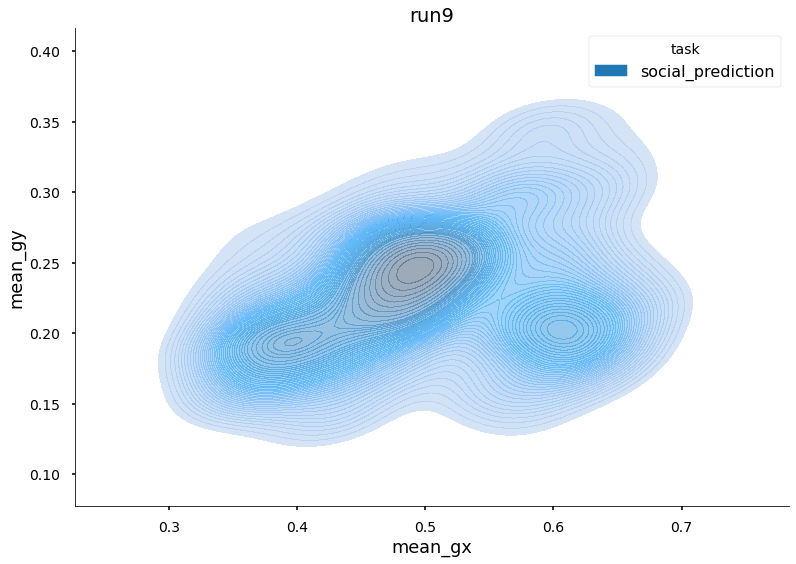

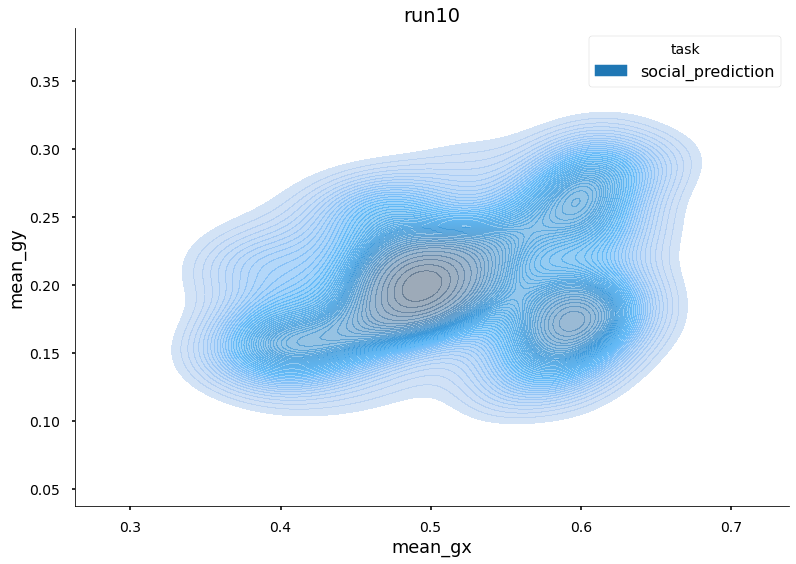

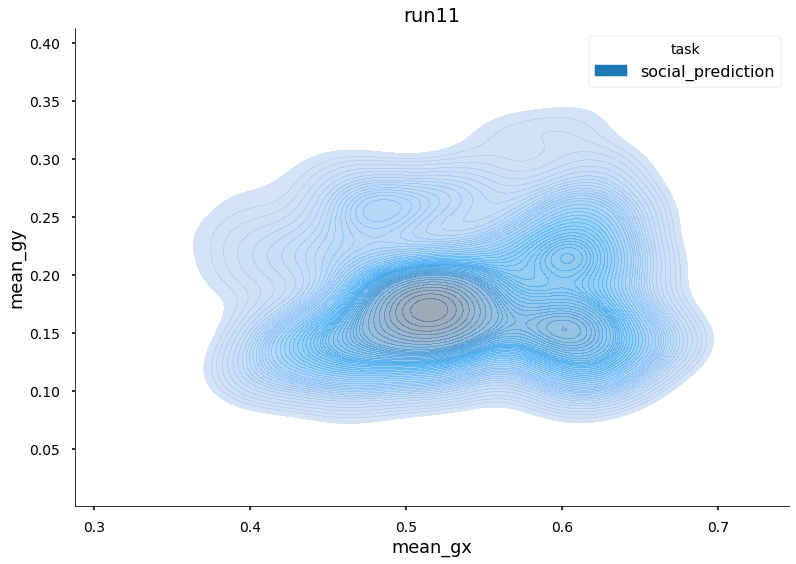

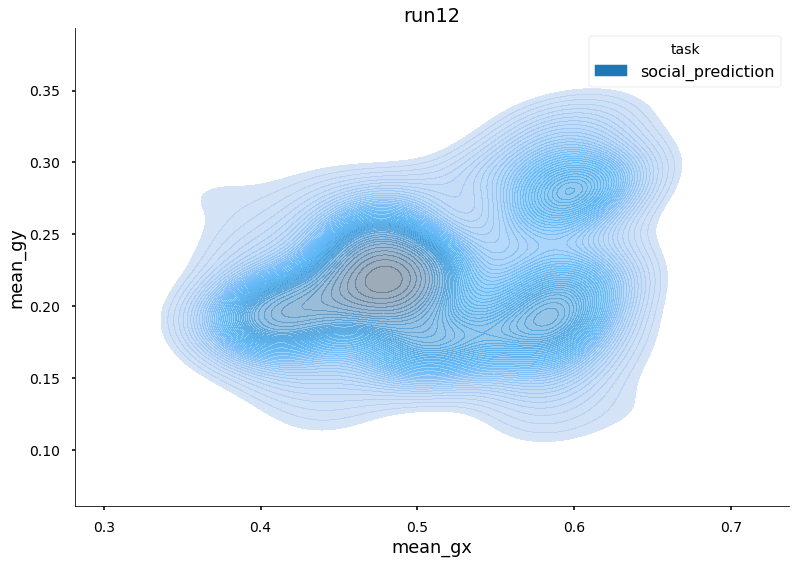

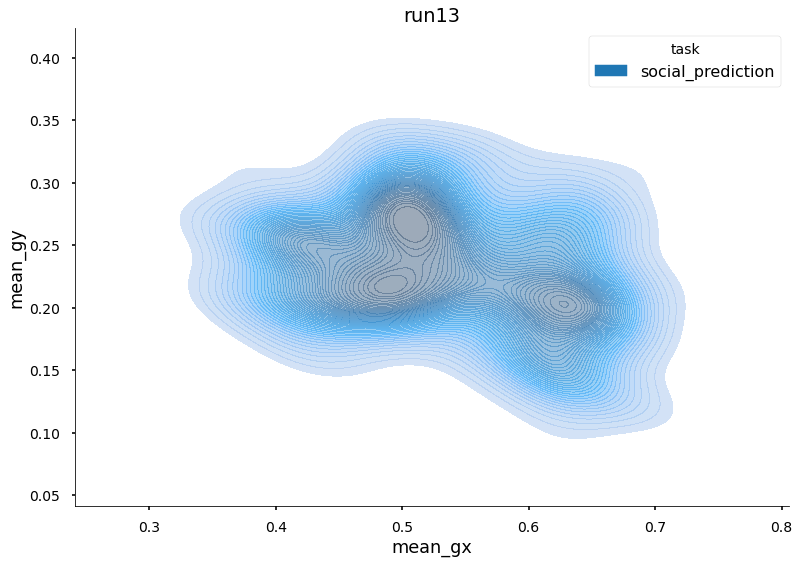

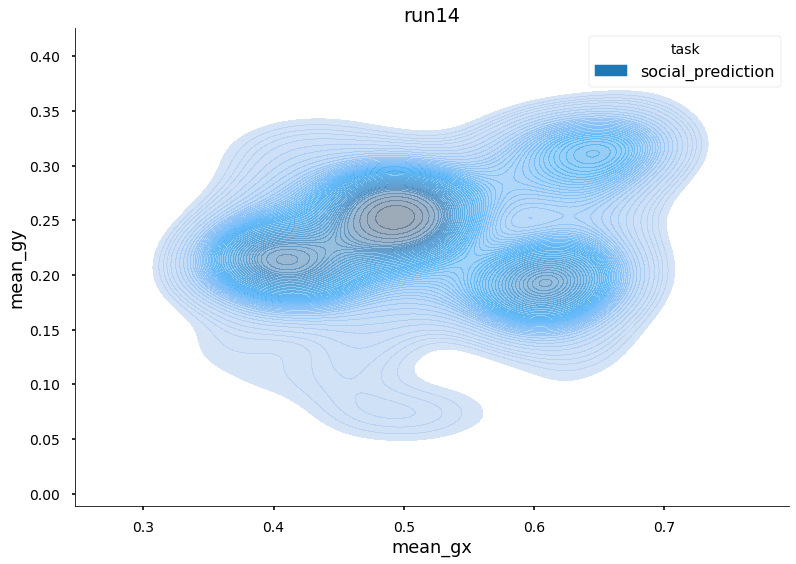

In [146]:
# heatmap
#goal: overlay average eye movement patterns 
# one subj, one run
for run in range(14):
    tmp = df_eye[(df_eye['subj']=='sIU') & (df_eye['run_num']==run+1) & (df_eye['type']=="fixations")]
    vis.plot_gaze_positions(dataframe=tmp)
    plt.title(f'run{run+1}')

In [64]:
df = df_merged.groupby(['subj', 'sess', 'run_num','type', 'actors', 'label', 'condition_name']
                      ).agg({'rt': 'mean',
                            'corr_resp': 'mean', 
                            'dispersion': 'mean', 
                            'amplitude': 'mean', 
                            'peak_velocity': 'mean', 
                            'duration': 'mean'}).reset_index()

DataError: No numeric types to aggregate

In [16]:
df_merged.columns

Index(['peak_velocity', 'amplitude', 'dispersion', 'start_gx', 'start_gy',
       'end_gx', 'end_gy', 'surface', 'end_time', 'type', 'duration',
       'mean_gx', 'mean_gy', 'block_iter', 'exp_event', 'task', 'event_type',
       'run_num', 'subtract', 'onset_sec', 'subj', 'sess', 'start_time',
       'dataset', 'balance_exp', 'stim', 'condition_name',
       'display_trial_feedback', 'replace_stimuli', 'feedback_type',
       'trial_type', 'hand', 'iti_dur', 'trial_dur', 'corr_key', 'resp_made',
       'corr_resp', 'rt', 'real_start_time', 'run_iter', 'session_type',
       'extracted', 'video_name', 'label', 'context', 'initiator', 'agents',
       'angle', 'interact_start_frames', 'initiator_start_frames', 'actors',
       'video_name_corrected', 'interact_start_frames_corr',
       'interact_start_frames_sec', 'initiator_start_frames_corr',
       'initiator_start_frames_sec', 'media', 'video_start', 'video_end',
       'timestamp_sec', 'block_iter_corr'],
      dtype='object')

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit()

ModuleNotFoundError: No module named 'sklearn'